In [12]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [13]:
bad_loci = []
loci = open('Similarity_Text.txt').readline()

for name in loci.split():
    name = name.replace('...','')
    bad_loci.append(name)

print bad_loci


['Ashanti', '2zxq', 'B7GRY', 'D6ZU2', 'Q8G62', 'F9XZP5', 'I3WK73', 'D9R6V', 'Q024H', 'W5X5T', 'H6NCQ', 'C0Z6B', 'C3AVD', 'C2W75', 'C3AKL', 'C2QAW', 'C3L5M', 'Q81RR', 'Q63CI6', 'C2YQI0', 'C2XSW', 'C2Z6Q', 'K0FEG', 'C2S2J1', 'B2TJW8', 'B1HND', 'F9VJD7', 'K8E6T', 'F7YT62', 'Q7MCR', 'Q9KMR', 'B7VSN', 'I2BPP5', 'Q2SB8', 'V6KVU', 'G2PGA', 'K0ENQ', 'W5WMI', 'A2FDT', 'G0L00', 'F0RBZ2', 'F3ZV98', 'H6NFV', 'Q833X', 'I3WG3', 'Q8G71', 'W5W3Z', 'C2S2Q', 'S0EXX9']


In [14]:
good_loci = []

with open('HMMR_Alignment.fasta') as f:
    # 'with' creates a block kind of like defining a fucntion that allows a document to be opened as a file handle
    # object; closing a file handle is important, because opening a file handle more than once can cause issues 
    # --think about when you open a word doc more than once--
    for line in f:
        if line[0] == '>':
            good_loci.append(line[1:].strip()) # '.strip()' removes whitespace from STRINGS only
            
print good_loci 
            

['Ashanti_Glyco', '2zxq', 'B7GRY0_BIFLS', 'D6ZU29_BIFLJ', 'Q8G622_BIFLO', 'F9XZP5_BIFBU', 'I3WK73_BIFBI', 'D9R6V4_CLOSW', 'Q024H3_SOLUE', 'W5X5T4_9BACT', 'H6NCQ7_9BACL', 'C0Z6B5_BREBN', 'C3AVD4_BACMY', 'C2W753_BACCE', 'C3AKL9_BACMY', 'C2QAW6_BACCE', 'C3L5M0_BACAC', 'Q81RR8_BACAN', 'Q63CI6_BACCZ', 'C2YQI0_BACCE', 'C2XSW2_BACCE', 'C2Z6Q8_BACCE', 'K0FEG5_BACTU', 'C2S2J1_BACCE', 'B2TJW8_CLOBB', 'B1HND6_LYSSC', 'F9VJD7_ARTSS', 'K8E6T3_CARML', 'F7YT62_VIBA7', 'Q7MCR2_VIBVY', 'Q9KMR6_VIBCH', 'B7VSN0_VIBSL', 'I2BPP5_PSEFL', 'Q2SB82_HAHCH', 'V6KVU1_STRRC', 'G2PGA1_STRVO', 'K0ENQ5_9NOCA', 'W5WMI2_9PSEU', 'A2FDT7_TRIVA', 'G0L004_ZOBGA', 'F0RBZ2_CELLC', 'F3ZV98_MAHA5', 'H6NFV0_9BACL', 'Q833X5_ENTFA', 'I3WG31_BIFBI', 'Q8G712_BIFLO', 'W5W3Z8_9PSEU', 'C2S2Q8_BACCE', 'S0EXX9_9BACT']


In [15]:
import re

identities = []
n = 0

valid = re.compile(r"^[0-9]")
with open('Similarity_Text.txt') as f:
    for line in f:
        if valid.match(line):
            line = line.replace('%','').strip().split()
            line.insert(n,'100')
            line = ','.join(line)
            identities.append(line)
            n = n + 1
f = open('Identities.csv','w')

f.write( 'p,' + ','.join(good_loci) + '\n' )

for a in zip(good_loci,identities):
    f.write(','.join(a)+'\n')

f.close()    

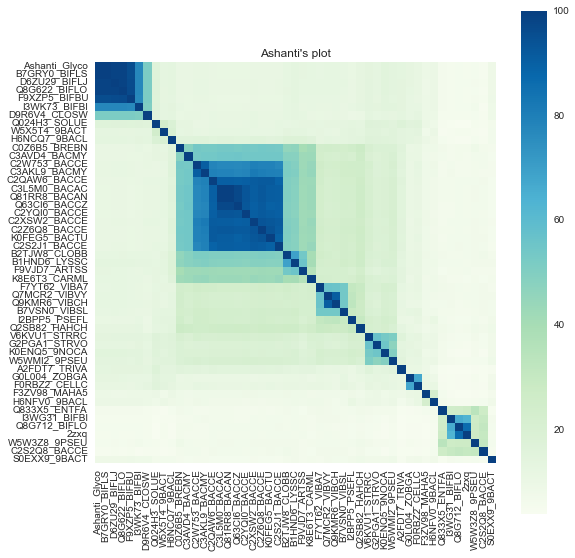

In [54]:
import pandas
import seaborn

figure(figsize=(9,9))
good_loci.remove('2zxq')
good_loci.insert( -3, '2zxq' )

df = pandas.read_csv('Identities.csv', index_col = 'p')
df = df[good_loci]
df = df.T[good_loci]

seaborn.heatmap(df, square = True, cmap = 'GnBu')



ylabel('')
xlabel('')
title('Ashanti\'s plot')

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [18]:
import nwalign as nw
import screed
import pandas as pd
import seaborn as sns
from scipy.cluster import hierarchy

In [30]:
records = [record for record in screed.open('Distance_Matrix_Seq.fasta')]

In [31]:
!curl -O ftp://ftp.ncbi.nih.gov/blast/matrices/BLOSUM90

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2122  100  2122    0     0   1001      0  0:00:02  0:00:02 --:--:--  1002


In [32]:
results = {}
for record_A in records:
    results[record_A.name] = {}
    for record_B in records:
        # nwalign is funky: it first produces raw alignment strings
        aln_A, aln_B = nw.global_align(record_A.sequence, record_B.sequence, matrix='BLOSUM90')
        # now calc the actual alignment score.
        score = nw.score_alignment(aln_A, aln_B, -5, -2, matrix='BLOSUM90')
        results[record_A.name][record_B.name] = score

In [33]:
data = pd.DataFrame(results)
data.head()

,5a57_S._pneumoniae,A2FDT7_TRIVA,B._biavatii_DSM_23969,B._bifidum_ATCC_29521,B._bifidum_BGN4,B._bifidum_IF10/10,B._bifidum_JCM_1254,B._bifidum_LMG_11041,B._bifidum_LMG_13195,B._bifidum_PRL2010,...,Q7MCR2_VIBVY,Q81RR8_BACAN,Q833X5_ENTFA,Q8G622_BIFLO,Q9KMR6_VIBCH,S0EXX9_9BACT,V6KVU1_STRRC,W5W3Z8_9PSEU,W5WMI2_9PSEU,W5X5T4_9BACT
5a57_S._pneumoniae,7013,-739,-689,-708,-684,-708,-683,-708,-708,-703,...,-559,-433,947,-719,-592,-640,-640,778,-654,-541
A2FDT7_TRIVA,-739,2896,-451,-323,-318,-323,-313,-323,-323,-318,...,-342,-327,-1127,-274,-377,-878,-349,-913,-375,-352
B._biavatii_DSM_23969,-689,-451,4561,2649,2665,2649,2656,2649,2649,2654,...,-341,-379,-839,2705,-272,-631,-207,-727,-189,-416
B._bifidum_ATCC_29521,-708,-323,2649,4039,4005,4039,3986,4039,4039,4027,...,-224,-301,-868,2968,-180,-629,-211,-767,-180,-304
B._bifidum_BGN4,-684,-318,2665,4005,4031,4005,3995,4005,4005,4010,...,-218,-288,-863,2984,-179,-655,-209,-757,-180,-304


In [35]:
for key, row in data.iterrows():
    new_row = row / row[key]
    data.ix[key] = new_row
    
data.head()

,5a57_S._pneumoniae,A2FDT7_TRIVA,B._biavatii_DSM_23969,B._bifidum_ATCC_29521,B._bifidum_BGN4,B._bifidum_IF10/10,B._bifidum_JCM_1254,B._bifidum_LMG_11041,B._bifidum_LMG_13195,B._bifidum_PRL2010,...,Q7MCR2_VIBVY,Q81RR8_BACAN,Q833X5_ENTFA,Q8G622_BIFLO,Q9KMR6_VIBCH,S0EXX9_9BACT,V6KVU1_STRRC,W5W3Z8_9PSEU,W5WMI2_9PSEU,W5X5T4_9BACT
5a57_S._pneumoniae,1.000000,-0.105376,-0.098246,-0.100955,-0.097533,-0.100955,-0.097391,-0.100955,-0.100955,-0.100242,...,-0.079709,-0.061742,0.135035,-0.102524,-0.084415,-0.091259,-0.091259,0.110937,-0.093255,-0.077142
A2FDT7_TRIVA,-0.255180,1.000000,-0.155732,-0.111533,-0.109807,-0.111533,-0.108080,-0.111533,-0.111533,-0.109807,...,-0.118094,-0.112914,-0.389157,-0.094613,-0.130180,-0.303177,-0.120511,-0.315262,-0.129489,-0.121547
B._biavatii_DSM_23969,-0.151063,-0.098882,1.000000,0.580794,0.584302,0.580794,0.582328,0.580794,0.580794,0.581890,...,-0.074764,-0.083096,-0.183951,0.593072,-0.059636,-0.138347,-0.045385,-0.159395,-0.041438,-0.091208
B._bifidum_ATCC_29521,-0.175291,-0.079970,0.655855,1.000000,0.991582,1.000000,0.986878,1.000000,1.000000,0.997029,...,-0.055459,-0.074523,-0.214905,0.734835,-0.044565,-0.155732,-0.052241,-0.189898,-0.044565,-0.075266
B._bifidum_BGN4,-0.169685,-0.078889,0.661126,0.993550,1.000000,0.993550,0.991069,0.993550,0.993550,0.994790,...,-0.054081,-0.071446,-0.214091,0.740263,-0.044406,-0.162491,-0.051848,-0.187795,-0.044654,-0.075416


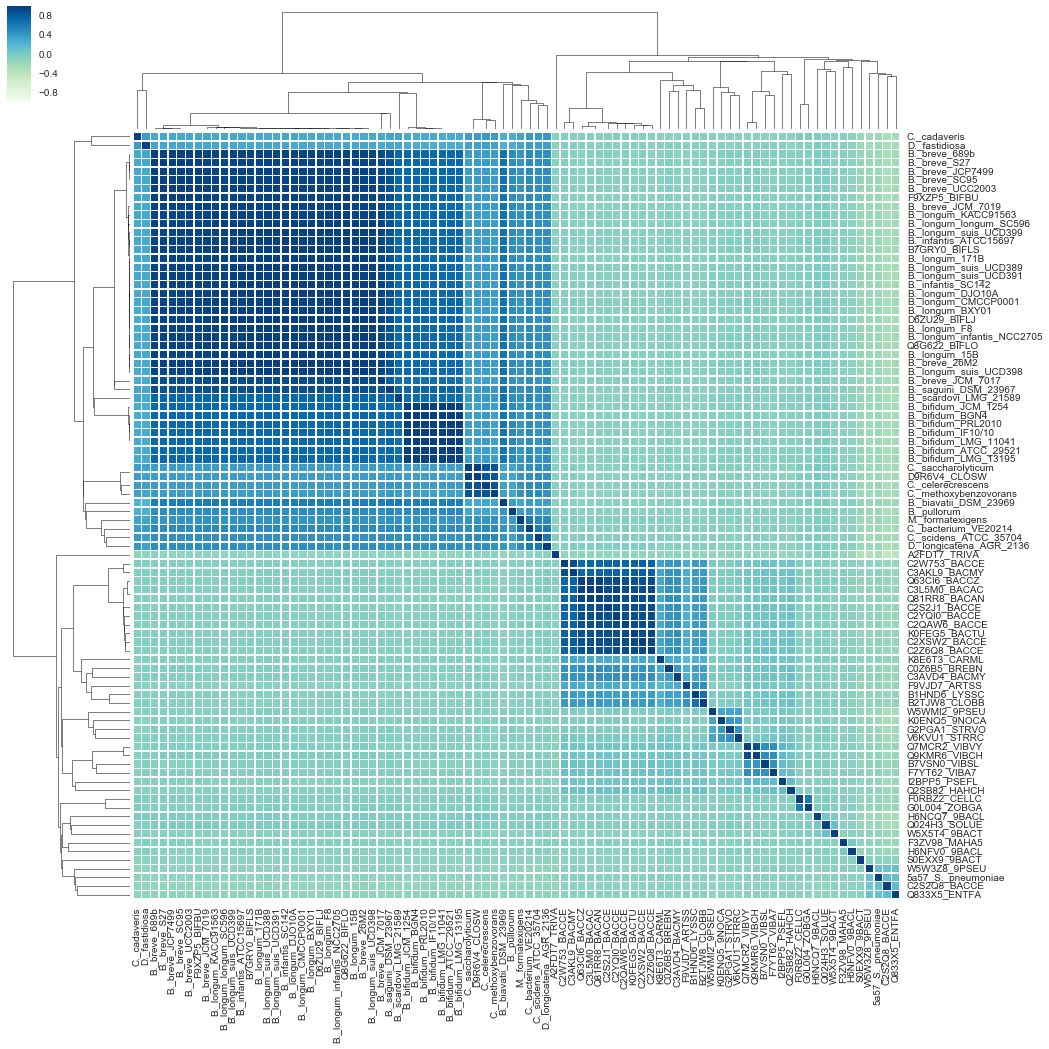

In [58]:
linkage = hierarchy.linkage( data )
#cmap = sns.cubehelix_palette(as_cmap=True, rot=-.3, light=1)
clst = sns.clustermap(data, row_linkage=linkage, col_linkage=linkage, 
                      linewidth=0.5, figsize=(16, 16), square=True, cmap = 'GnBu')
plt.setp(clst.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.setp(clst.ax_heatmap.xaxis.get_majorticklabels(), rotation=90)
clst.savefig('similarity_clustermap.pdf')
clst.savefig('similarity_clustermap.png')


In [38]:
!./clustal-omega-1.2.0-macosx -i Distance_Matrix_Seq.fasta --outfmt=fasta -o Distance_Matrix_Seq_Algn.fasta

FastTree Version 2.1.8 SSE3
Alignment: Distance_Matrix_Seq_Algn.fasta
Amino acid distances: BLOSUM45 Joins: balanced Support: SH-like 1000
Search: Normal +NNI +SPR (2 rounds range 10) +ML-NNI opt-each=1
TopHits: 1.00*sqrtN close=default refresh=0.80
ML Model: Jones-Taylor-Thorton, CAT approximation with 20 rate categories
/bin/sh: line 1: 11921 Segmentation fault: 11  ./FastTree 'Distance_Matrix_Seq_Algn.fasta' > Distance_Matrix_Seq_Tree.tree


In [39]:
!./FastTree 'Distance_Matrix_Seq_Algn.fasta' > Distance_Matrix_Seq_Tree.tree

FastTree Version 2.1.8 No SSE3
Alignment: Distance_Matrix_Seq_Algn.fasta
Amino acid distances: BLOSUM45 Joins: balanced Support: SH-like 1000
Search: Normal +NNI +SPR (2 rounds range 10) +ML-NNI opt-each=1
TopHits: 1.00*sqrtN close=default refresh=0.80
ML Model: Jones-Taylor-Thorton, CAT approximation with 20 rate categories
Initial topology in 0.19 seconds
Refining topology: 25 rounds ME-NNIs, 2 rounds ME-SPRs, 12 rounds ML-NNIs
Total branch-length 21.103 after 1.55 sec
ML-NNI round 1: LogLk = -66225.144 NNIs 10 max delta 7.95 Time 5.39
Switched to using 20 rate categories (CAT approximation)
Rate categories were divided by 0.873 so that average rate = 1.0
CAT-based log-likelihoods may not be comparable across runs
Use -gamma for approximate but comparable Gamma(20) log-likelihoods
ML-NNI round 2: LogLk = -64146.630 NNIs 7 max delta 4.59 Time 8.78
ML-NNI round 3: LogLk = -64144.863 NNIs 0 max delta 0.00 Time 10.05
Turning off heuristics for final round of ML NNIs (converged)
ML-NNI ro

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

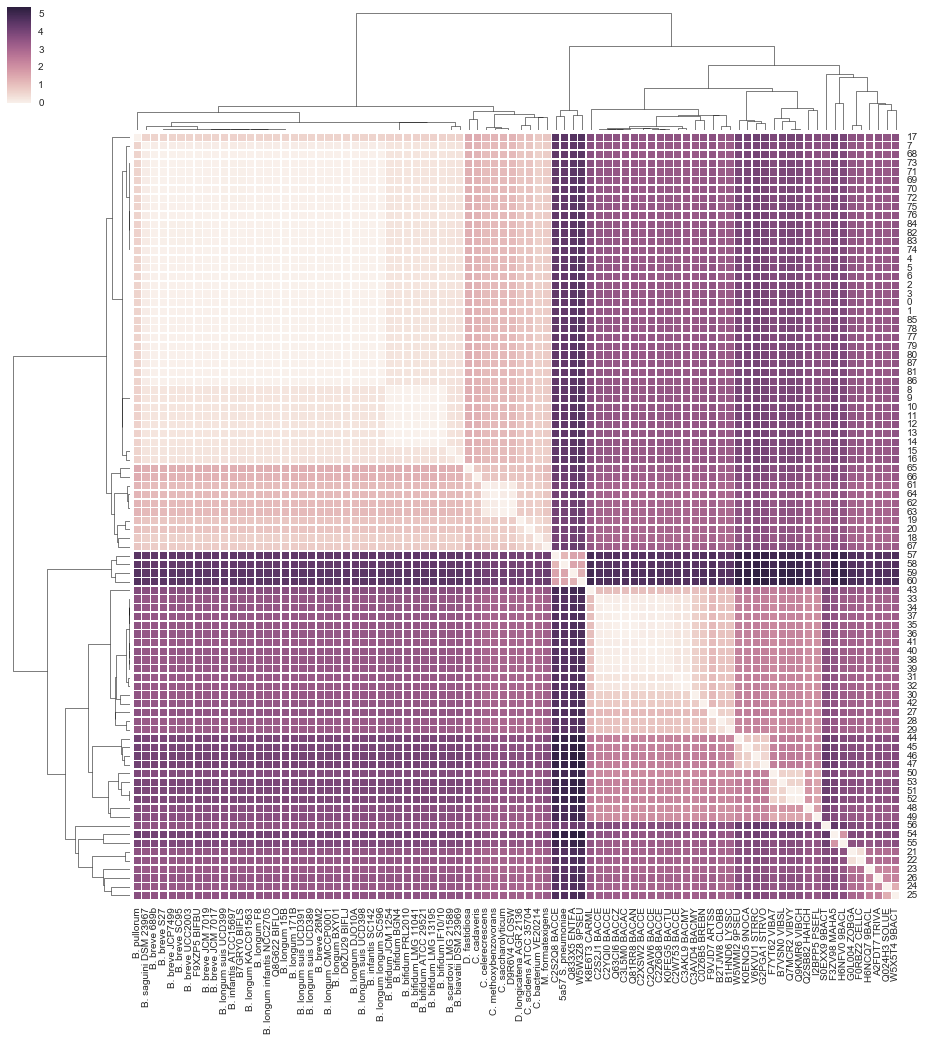

In [57]:
import skbio
import scipy
import seaborn

pftree = skbio.tree.TreeNode.read( 'Distance_Matrix_Seq_Tree.tree' )
pftree.root_at_midpoint()
pfdm = pftree.tip_tip_distances()

linkage = scipy.cluster.hierarchy.linkage( pfdm.data )

##cmap = seaborn.cubehelix_palette(as_cmap=True, rot=-.3, light=1, reverse=True)
p = seaborn.clustermap( pfdm.data, row_linkage=linkage, col_linkage=linkage, 
                        xticklabels=pfdm.ids, linewidth=0.5, 
                       figsize=(16, 16), square=True)

plt.setp(p.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.setp(p.ax_heatmap.xaxis.get_majorticklabels(), rotation=90)
